In [6]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

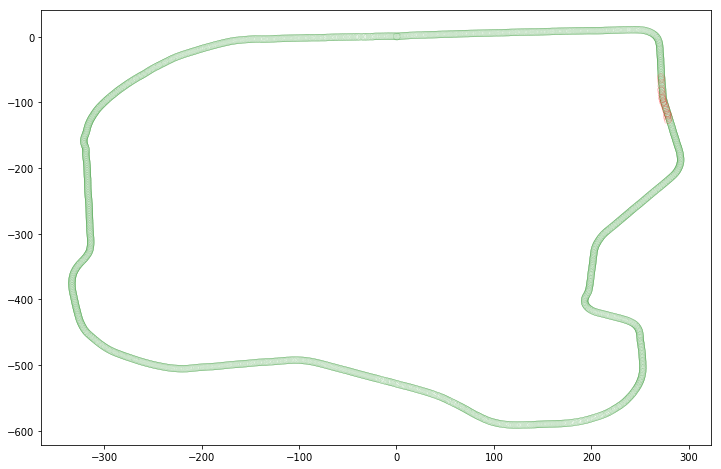

In [7]:
csv_dir = '/home/ivslab/Desktop/Waypoints_Vision_CSV/bspline_straight.csv'

df_pred = pd.read_csv(csv_dir)
fig = plt.figure(figsize=(12,8))



csv_dir = '/home/ivslab/Desktop/NCTU_ROUND/nctu_round_icp.csv'
df = pd.read_csv(csv_dir)

# marker_style = {'filled_markers':'o',
#  'fillstyles ':'none'}
g= plt.scatter(df['x'],df['y'],s=50, c='r',edgecolors='g',linewidths=0.1 )
g.set_facecolor('none')
g = plt.scatter(df_pred['X'],df_pred['Y'],s=50, c='g',edgecolors='r',linewidths=0.1)
g.set_facecolor('none')
plt.show()

In [8]:
import pandas as pd
from scipy.spatial.distance import cdist




def closest_point(point, points):
    """ Find closest point from a list of points. """
    return points[cdist([point], points).argmin()]
def closest_distance(point, points):
    """ Find closest point from a list of points. """
    return cdist([point], points).min()
def match_value(df, col1, x, col2):
    """ Match value x from col1 row to value in col2. """
    return df[df[col1] == x][col2].values[0]


df1 = df
df2 = df_pred

df1['point'] = [(x, y) for x,y in zip(df1['x'], df1['y'])]
df2['point'] = [(x, y) for x,y in zip(df2['X'], df2['Y'])]

df2['closest'] = [closest_point(x, list(df1['point'])) for x in df2['point']]
df2['distance'] = [closest_distance(x, list(df1['point'])) for x in df2['point']]




0.9160550733909487

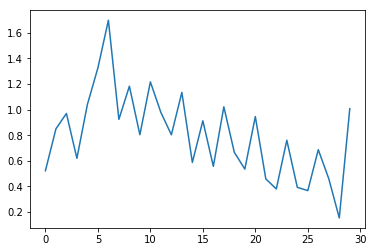

In [9]:
plt.plot(df2.distance[:30])
df2.distance.mean()

In [10]:
df2

,Unnamed: 0,X,Y,point,closest,distance
0,0,271.582019,-61.444516,"(271.582019088, -61.4445161341)","(272.0855, -61.3031)",0.522964
1,1,271.358703,-63.455656,"(271.358703155, -63.4556561515)","(272.1967, -63.5982)",0.850034
2,2,271.315603,-65.458992,"(271.315602593, -65.458992166)","(272.26, -65.6816)",0.970279
3,0,271.955069,-69.762571,"(271.955068946, -69.7625706032)","(272.4946, -70.0679)",0.619935
4,1,271.867073,-74.801785,"(271.86707312, -74.8017852028)","(272.8401, -74.4327)",1.040675
5,0,271.818899,-80.221558,"(271.818899156, -80.2215577564)","(273.1198, -79.9646)",1.326036
6,1,271.483954,-82.237660,"(271.483953912, -82.2376595709)","(273.1818, -82.1907)",1.698495
7,0,272.363958,-82.620664,"(272.36395774, -82.6206635144)","(273.1818, -82.1907)",0.923978
8,1,272.165648,-86.638602,"(272.165648261, -86.6386023559)","(273.3486, -86.6083)",1.183340
9,0,272.671096,-88.055390,"(272.671096231, -88.0553900274)","(273.3971, -87.7092)",0.804319
